**BA1A: Compute the Number of Times a Pattern Appears in a Text**

In [ ]:
def patternCount(Text,pattern):
  cnt = 0
  i = 0
  j = len(pattern)
  while j <= len(Text):
    # print('i = ',i,'j = ',j,'cnt = ',cnt)
    if Text[i:j] == pattern:
      cnt += 1
    i += 1 
    j += 1 
  return cnt    

ans = patternCount("AAAGAGTGTCTGATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAATATAGGCATAGCGCACAGACAGATAATAATTACAGAGTACACAACATCCAT",'AAA')
print(ans)

4


**BA1B: Find the Most Frequent Words in a String**

In [ ]:
def mostFrequentKmer(dna,k):
  d = dict()
  for i in range(len(dna) - k + 1):
    if dna[i:i+k] in d:
      d[dna[i:i+k]] += 1
    else:
      d[dna[i:i+k]] = 1
  m = max(d.values())
  for k,val in d.items():
    if val ==  m:
      print(k,end = ' ')  
mostFrequentKmer("ACGTTGCATGTCGCATGATGCATGAGAGCT",4)


GCAT CATG 

**BA1C: Find the Reverse Complement of a String**

In [ ]:
!pip install Bio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 273 kB 4.4 MB/s 
     |████████████████████████████████| 2.7 MB 54.2 MB/s 


In [ ]:
def reverseComplement(dna):
  s =''
  for i in dna:
    if i == 'A':
      s += 'T'
    if i == 'T':
      s += 'A'  
    if i == 'C':
      s += 'G'
    if i == 'G':
      s += 'C'  
  return s[::-1]    

# dna = "AAAACCCGGT"
# print(reverseComplement(dna))

# or 
from Bio import Seq
def reverseComplement1(dna):
  return Seq.reverse_complement(dna)

dna = "AAAACCCGGT"
print(reverseComplement1(dna))



ACCGGGTTTT


**BA1D: Find All Occurrences of a Pattern in a String**

In [ ]:
def findAllLoc(pattern,dna):
  i = 0
  ld = len(dna)
  lp = len(pattern)
  ans = []
  for i in range(ld-lp+1):
    # print(dna[i:i+lp])
    if dna[i:i+lp] == pattern:
      ans.append(i)
  return ans    

pattern = "ATAT"
dna = "GATATATGCATATACTT" 
l = findAllLoc(pattern,dna)

for i in l:
  print(i,end = ' ')

1 3 9 

**BA1E: Find Patterns Forming Clumps in a String**

In [ ]:
def frequencyTable(seq,k):
  freq = {}
  ls = len(seq)
  for i in range(ls-k+1):
    if seq[i:i+k] in freq:
      freq[seq[i:i+k]] += 1
    else:
      freq[seq[i:i+k]] = 1
  return freq    


def find_clumping_kmers(seq,k,l,t):
  ls = len(seq)
  kmers = set()
  for i in range(ls-l+1):
    freq_table = frequencyTable(seq[i:i+l],k)
    # print(freq_table)
    # print(len(seq[i:i+l]))
    for key,val in freq_table.items():
      if val>=t:
        kmers.add(key)
  return kmers   

seq = 'CGGACTCGACAGATGTGAAGAAATGTGAAGACTGAGTGAAGAGAAGAGGAAACACGACACGACATTGCGACATAATGTACGAATGTAATGTGCCTATGGC'
print(find_clumping_kmers(seq,5,75,4))




{'CGACA', 'AATGT', 'GAAGA'}


**BA1F: Find a Position in a Genome Minimizing the Skew**

In [ ]:
def minimumSkew(seq):
  l = [0]
  gc = 0

  for i in range(len(seq)):
    if seq[i] == 'G':
      gc += 1
    elif seq[i] == 'C':
      gc -= 1
    else:
      gc += 0
    l.append(gc)  
  mingc = min(l)  
  for i in range(len(l)):
    if l[i] == mingc:
      print(i,end =' ')  

minimumSkew('CCTATCGGTGGATTAGCATGTCCCTGTACGTTTCGCCGCGAACTAGTTCACACGGCTTGATGGCAAATGGTTTTTCCGGCGACCGTAATCGTCCACCGAG')
  



53 97 

**BA1G: Compute the Hamming Distance Between Two Strings**

In [ ]:
def hammingDistance(text1,text2):
  d = 0
  for i in range(len(text1)):
    if text1[i] != text2[i]:
      d += 1
  return d    


print(hammingDistance("GGGCCGTTGGT","GGACCGTTGAC"))

3


**BA1H: Find All Approximate Occurrences of a Pattern in a String**

In [ ]:
def hammingDistance(text1,text2):
  d = 0
  for i in range(len(text1)):
    if text1[i] != text2[i]:
      d += 1
  return d   

def findAllApproxLoc(pattern,Text,d):
  loc = []
  for i in range(len(Text) - len(pattern) + 1):
    if hammingDistance(Text[i:i+len(pattern)],pattern) <= d:
      loc.append(i)
  return loc    


print(findAllApproxLoc('ATTCTGGA','CGCCCGAATCCAGAACGCATTCCCATATTTCGGGACCACTGGCCTCCACGGTACGGACGTCAATCAAATGCCTAGCGGCTTGTGGTTTCTCCTACGCTCC',3)) 


[6, 7, 26, 27, 78]


**BA1I: Find the Most Frequent Words with Mismatches in a String**

In [ ]:
import itertools
def hamming_distance(seq1,seq2):
  s = 0
  for i,j in zip(seq1,seq2):
    if i != j:
      s += 1
  return s  

def frequentWord(seq,k,d):
  kmerList = [''.join(kmer) for kmer in itertools.product('ATCG', repeat= k)] #making all possible k-mer with ATCG
  kmerSeq = []
  for i in range(len(seq)-k+1):  #making all possible substring(k-mer) of given sequence
    kmerSeq.append(seq[i:i+k])
  dic =dict()
  for i in kmerList: #first loop for all kmer from KmerList
    for j in kmerSeq: #for all substring of given seq
      if hamming_distance(i,j)<=d:
        if i in dic:
          dic[i] += 1
        else:
          dic[i] = 1  
  maxval = max(dic.values())  # getting maximum frequency 
       
  return [kmer for kmer in dic.keys() if dic[kmer] == maxval] #return all possible kmer that have max frequency  

print(frequentWord("GATCGCGGCAATCATTGGGCCACACCAATCATTGGGCCACACCAATCATTTCAGGCTGGGCAATTTGAGGGCCACACCAATCATTGATCGCGGGGCAATTTGAGATCGCGGCAATCATTTCAGGCTGGGCAATTTGACAATCATTTCAGGCTGGGCAATTTGAGATCGCGGCAATCATTGATCGCGGCAATCATTGGCAATTTGAGATCGCGGGGCAATTTGAGGGCCACACGGCAATTTGAGGGCCACACGGGCCACACTCAGGCTGGATCGCGGGATCGCGGTCAGGCTGGATCGCGGGATCGCGGGGGCCACACGGGCCACACCAATCATTGATCGCGGGATCGCGGCAATCATTCAATCATTGATCGCGGGGCAATTTGAGGGCCACACGATCGCGGGATCGCGGGGCAATTTGATCAGGCTGGATCGCGGTCAGGCTGGGCAATTTGAGGGCCACACGATCGCGGGGGCCACACGGGCCACACTCAGGCTGGGCAATTTGACAATCATTGGGCCACACGATCGCGGTCAGGCTGGGGCCACACCAATCATTGGGCCACACGGCAATTTGAGGCAATTTGATCAGGCTGGGGCCACACGGGCCACACGGGCCACACCAATCATTTCAGGCTGGGCAATTTGATCAGGCTGGATCGCGGGGCAATTTGACAATCATTGGCAATTTGACAATCATTCAATCATTTCAGGCTGTCAGGCTGGGCAATTTGAGGCAATTTGAGATCGCGGGATCGCGGCAATCATTGGGCCACACGGGCCACACTCAGGCTGGGGCCACACTCAGGCTGGGGCCACACGGGCCACACGGCAATTTGACAATCATTTCAGGCTGCAATCATTTCAGGCTGTCAGGCTGGGGCCACACGGCAATTTGAGATCGCGGGGCAATTTGATCAGGCTGGGGCCACAC",5, 3))

['GGGAG']


**BA1J:Find Frequent Words with Mismatches and Reverse Complements**

In [ ]:
!pip install Bio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import itertools
from Bio import Seq
def hamming_distance(seq1,seq2):
  s = 0
  for i,j in zip(seq1,seq2):
    if i != j:
      s += 1
  return s  

def frequentWord(seq,k,d):
  kmerList = [''.join(kmer) for kmer in itertools.product('ATCG', repeat= k)] #making all possible k-mer with ATCG
  kmerSeq = []
  for i in range(len(seq)-k+1):  #making all possible substring(k-mer) of given sequence
    kmerSeq.append(seq[i:i+k])
  dic =dict()
  for i in kmerList: #first loop for all kmer from KmerList
    for j in kmerSeq: #for all substring of given seq
      if hamming_distance(i,j)<=d:
        if i in dic:
          dic[i] += 1
        else:
          dic[i] = 1
      if hamming_distance(Seq.reverse_complement(i),j)<=d:
        if i in dic:
          dic[i] += 1
        else:
          dic[i] = 1              
  maxval = max(dic.values())  # getting maximum frequency 
       
  return [kmer for kmer in dic.keys() if dic[kmer] == maxval] #return all possible kmer that have max frequency  

print(frequentWord('TTTCCGGGTGGATCATTTCGCCTGATTTCCGGGTCGCCTGACGCCTGATTTCCGGGTCGCCTGAGGATCATTTCGCCTGATTTCCGGGTTAACCCCACCCTCCGGATCATTTTAACCCCGGATCATTTCGCCTGATAACCCCTAACCCCTTTCCGGGTGGATCATTTACCCTCCGGATCATTTCGCCTGAGGATCATTTGGATCATTTTAACCCCGGATCATTTTAACCCCCGCCTGAGGATCATTTTAACCCCACCCTCCGGATCATTTTTTCCGGGTCGCCTGAGGATCATTTCGCCTGAGGATCATTTGGATCATTTTAACCCCTAACCCCTTTCCGGGTTTTCCGGGTACCCTCCTAACCCCGGATCATTTTTTCCGGGTCGCCTGATAACCCCTAACCCCACCCTCCACCCTCCCGCCTGATAACCCCACCCTCCGGATCATTTTTTCCGGGTTAACCCCTAACCCCACCCTCCTTTCCGGGTACCCTCCTAACCCCCGCCTGACGCCTGATAACCCCTTTCCGGGTTAACCCCTAACCCCTAACCCCTAACCCCTAACCCCTAACCCCTTTCCGGGTTTTCCGGGTTTTCCGGGTTTTCCGGGTACCCTCCGGATCATTTGGATCATTTCGCCTGACGCCTGATAACCCCTTTCCGGGTTTTCCGGGTCGCCTGACGCCTGACGCCTGAGGATCATTTCGCCTGACGCCTGATAACCCCACCCTCCACCCTCCTAACCCCGGATCATTTCGCCTGAGGATCATTTGGATCATTTTTTCCGGGTACCCTCCTTTCCGGGTCGCCTGACGCCTGAACCCTCCACCCTCCACCCTCCACCCTCCCGCCTGACGCCTGA',6,3))

['TCCCCC', 'GGGGGA']


In [ ]:
!pip install itertools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement itertools (from versions: none)
ERROR: No matching distribution found for itertools


In [ ]:
import itertools
# kmerList = [''.join(kmer) for kmer in itertools.product('ATCG', repeat= 4)]
kmerList = list(''.join(k) for k in itertools.product('AT',repeat = 2))
print(kmerList)

['AA', 'AT', 'TA', 'TT']


**BA1k: Generate the Frequency Array of a String**

In [ ]:
import itertools
from Bio import Seq
def freqArray(Text,k):
  kmerList = [''.join(kmer) for kmer in itertools.product('ATCG',repeat= k)]
  kmerList.sort()
  kmers = [Text[i:i+k] for i in range(len(Text)-k+1)]
  print(kmers)
  for i in kmerList:
    cnt = 0 
    for j in kmers:
      if i == j :
        cnt+=1

    print(cnt,end = " ")
freqArray('ACGCGGCTCTGAAA',2)  


['AC', 'CG', 'GC', 'CG', 'GG', 'GC', 'CT', 'TC', 'CT', 'TG', 'GA', 'AA', 'AA']
2 1 0 0 0 0 2 2 1 2 1 0 0 1 1 0 

**BA1L:Implement PatternToNumber**

In [ ]:
def patternToNumber(dna):
  dic = {'A':0,'C':1,'G':2,'T':3}
  number = 0
  l = len(dna)-1
  for i in dna:
    number += dic[i]*pow(4,l)
    l-=1
  return number
patternToNumber('AGT')    


11

**BA1M:Implement NumberToPattern**

In [ ]:
def numberToPattern(index,k):
  dic = {'A':0,'C':1,'G':2,'T':3}
  l = []
  for i in range(k):
    l.append(index%4)
    index = index//4
  l.reverse()
  s =''
  for i in l:
    for key,v in dic.items():
      if i ==v:
        s += key
    
  return s

numberToPattern(45,4)

'AGTC'

**BA1N:Generate the d-Neighborhood of a String**

In [ ]:
def hamming_dist(T1,T2):
  d = 0
  for i in range(len(T1)):
    if T1[i]!=T2[i]:
      d += 1
  return d   

def dNeighbour(pattern,d):
  k = len(pattern)
  kmerlist = [''.join(kmer) for kmer in itertools.product('ATCG',repeat = k)]

  for i in kmerlist:
    if hamming_dist(pattern,i)<=d:
      print(i)
dNeighbour('TTATGCTAC',2)


**BA2A:Implement MotifEnumeration**

In [ ]:
import itertools
def HammingDistance(T1,T2):
  return sum(i!=j for i,j in zip(T1,T2))

def isAppears(dnaList,kmer,d):
  dic = {}
  for i in dnaList:
    for j in range(len(i)-len(kmer)+1):
      if HammingDistance(i[j:j+len(kmer)],kmer)<=d:
        if kmer not in dic:
          dic[kmer] = 1
          break
        else:
          dic[kmer]+=1
          break  
  return True if (kmer in dic and dic[kmer] == len(dnaList)) else False

def motifEnumeration(DnaList, k, d):
  ans = []
  kmerList = [''.join(kmer) for kmer in itertools.product('ATCG',repeat = k)] #making all possible kmer from dnaList
  for i in kmerList:
    if isAppears(DnaList,i,d):
      ans.append(i)
  return ans   

dna = '''
CTTATAGTCGGGCCCGGCGACTCTC
ACCCTACTCGACCCAAGGGTGGTCC
CTGTTCCTCCAATCGTCGAGGCTCC
GGACCACCGAGATCAGATCTACCGA
AAGGTAAAGGTATCTGAACCAACGT
GCCCCCGCTTTCTCAAAGCAGCCGA
GATTGGGGCCAAGCTGTCCATGACG
GTTCCACTTCCGTGGAAGTCCCCCT
GTCTTGTTCCTTTGTTTCGTTTTGG
CACGAGCACCACCATGACGACCAGA
'''.split()  
res = motifEnumeration(dna,5,2)  

for i in res:
  print(i,end = ' ')
     


AATGT AACTT AACCT AACGT ATACC ATACG ATCTT ATCTC ATCCT ATCCC ATCCG ATCGA ATCGC ATCGG ATGTC ATGCG ACTAT ACTAG ACTCT ACTGT ACCAT ACCTT ACCTC ACCTG ACCCT ACCGT ACGGT AGTAC AGTTC AGCTC AGCGT TAACT TAACG TAAGG TATCG TACCC TACCG TACGA TACGC TAGCG TTAAG TTACA TTACT TTACC TTACG TTAGA TTTAC TTTCG TTTGA TTCAC TTCCA TTCGA TTGAT TTGAC TCAAG TCATC TCATG TCACT TCACG TCAGG TCTAT TCTAC TCTAG TCTTG TCTCC TCTCG TCCAC TCCAG TCCTG TCCCA TCCCT TCCGA TCCGT TCCGC TCGAA TCGAC TCGAG TCGGA TCGGC TGATA TGACT TGACG TGTAG TGTCA TGTCT TGTCC TGTCG TGTGA TGCAC TGCTC TGCCA TGCCT TGCCC TGCGA TGGCC CAATT CAAGT CATAT CATAG CATTG CATCT CATCG CATGG CACTG CACCT CACGT CAGTG CAGGT CTAAG CTATT CTATC CTATG CTACC CTACG CTAGA CTAGC CTAGG CTTAC CTTTA CTTCA CTTGA CTCAT CTCAG CTCTA CTCTG CTCCA CTCCG CTCGA CTCGG CTGAG CTGTC CTGTG CTGCC CTGGA CTGGC CCAAT CCATA CCATT CCATC CCATG CCACT CCAGT CCTAT CCTAC CCTAG CCTTC CCTCA CCTCT CCTCC CCTCG CCTGA CCTGC CCTGG CCCAT CCCTA CCCTC CCCTG CCCGT CCGAT CCGTA CCGTC CCGGT CGAAT CGATG CGACT CGTAA CGTA

**BA2B: Find a Median String**

In [ ]:
import itertools
def hammingDist(T1,T2):
  return sum(i!=j for i,j in zip(T1,T2))

def minHammingDist(pattern,Text):
  kmerList = [Text[i:i+len(pattern)] for i in range(len(Text)-len(pattern)+1)]
  mind = len(pattern)
  for i in kmerList:
    mind = min(mind,hammingDist(i,pattern))
  return mind 

def MedianString(dnaList,k):
  kmerList = [''.join(kmer) for kmer in itertools.product('ATCG',repeat= k)]
  dic = {}
  for kmer in kmerList:
    s = 0
    for i in dnaList:
      s += minHammingDist(kmer,i)
    dic[kmer] = s  
  minval = min(dic.values())
  for k,v in dic.items():
    if v == minval:
      return k

dnaList = '''
TGCGCTCTTAATTGACCAATGATTTGATACGCCGTGGACGCA
ATCTATTCGAATTCTTTCGGGGCCTTCGCTAATACATGATAC
ATTACCTTAGGCTGAAACGCAGAAACCATCACCTAAGTTCCT
TGATACGGTCACTCTCAGTGTGGTCAGCCGACATTCACTTTC
CAGCTAGCCACCCTCAGGTGATACAGATATCAGCCAGAATAC
TGATACAGAGAGAAGGCCTAGACGCCGGTAAGCGCTATCGGA
TGACACCCTAGGGGATTACCGCTACTTTGCAGTAGCGACAAG
GTGGATTGAAACAGAGGAGCTGATTAGAACATATAGAGCTTA
TTACGCAGATCTTGAAACAATCGCTCGTTAAGTCTCGCGTAC
GTAGCCCGGCTCCCGGCTGTCCCCTGCCGATGAGACGCCTGA
'''.split()

print(MedianString(dnaList,6))

TGATAC


**BA2C:Find a Profile-most Probable k-mer in a String**

In [ ]:
def profileMostProbable(text,k,profile):
  kmerList = [text[i:i+k] for i in range(len(text)-k+1)]
  dic = {}
  for i in kmerList:
    pr = 1
    for j in range(len(i)):
      if i[j] == 'A':
        pr = pr*float(profile[0][j])
      if i[j] == 'C':
        pr = pr*float(profile[1][j])
      if i[j] == 'G':
        pr = pr*float(profile[2][j])
      if i[j] == 'T':
        pr = pr*float(profile[3][j])   
    dic[i] = pr
  mx = max(dic.values())
  print(dic)
  for k,v in dic.items():
    if mx == v:
      return k      

text = 'CCCGGATTGGGCTGATAGTTAAACGTTCATCTTGTTATGTAAGGGGGACCTAAATCGTGAGCAAGGACACCACAAACGCATAAAGATTTTCCAACTCGCACATTACAAGTACATTCGAGAGATTTTTGAGCTTAGCCGGGCCCCGCCACATCGCGCCCCGAAACCGAAACAAACCTTTGGCCTGGACTAGGTTCGGTGCC'
profile ='''0.321 0.393 0.286 0.25 0.286 0.25 0.286
0.143 0.286 0.321 0.179 0.25 0.214 0.321
0.179 0.214 0.143 0.179 0.179 0.179 0.214
0.357 0.107 0.25 0.393 0.286 0.357 0.179
'''.splitlines()
profileMatrix = []
for i in profile:
  profileMatrix.append(i.split())
print(profileMostProbable(text,7,profileMatrix))
 


{'CCCGGAT': 1.8823752527365494e-05, 'CCGGATT': 1.913279504471134e-05, 'CGGATTG': 2.390418160330199e-05, 'GGATTGG': 4.716916901471859e-05, 'GATTGGG': 4.73912294667885e-05, 'ATTGGGC': 1.580858301279825e-05, 'TTGGGCT': 6.704415130935519e-06, 'TGGGCTG': 3.7350210694796984e-05, 'GGGCTGA': 1.435624859420408e-05, 'GGCTGAT': 3.8708866816384495e-05, 'GCTGATA': 6.689788477171797e-05, 'CTGATAG': 8.369811485749998e-06, 'TGATAGT': 7.868875391707728e-05, 'GATAGTT': 5.0292112314937494e-05, 'ATAGTTA': 5.134618208389268e-05, 'TAGTTAA': 0.00016123578235865095, 'AGTTAAA': 0.0001380140942895, 'GTTAAAC': 2.7474379968749998e-05, 'TTAAACG': 3.577269135039598e-05, 'TAAACGT': 8.035499509537498e-05, 'AAACGTT': 7.387388261096243e-05, 'AACGTTC': 0.00023757182166961644, 'ACGTTCA': 9.031200685203151e-05, 'CGTTCAT': 3.3636857718749996e-05, 'GTTCATC': 2.809112485028849e-05, 'TTCATCT': 3.3583802893641e-05, 'TCATCTT': 0.00018333867506654697, 'CATCTTG': 5.4950247148796993e-05, 'ATCTTGT': 3.970621482620107e-05, 'TCTTGTT'

**BA2F:Implement RandomizedMotifSearch**

**BA2G:Implement GibbsSampler**

**BA2H:Implement DistanceBetweenPatternAndStrings**

In [ ]:
def hammingDist(T1,T2):
  return sum(i!=j for i,j in zip(T1,T2))
def Dist_pattern_string(pattern,dna):
  s = 0
  for i in dna:
    d = len(pattern)
    for j in range(len(i)-len(pattern)+1):
      d = min(d,hammingDist(pattern,i[j:j+len(pattern)]))
    s += d
  return s

dna = '''CCCCCGGGCCATTTCAGGGTGAGCTGGCTCCGAACAAGCCGTGGCTTTCAACACCGTTTATGCTTGACGTTGGACGCCACCTGAGCAGTAA CGCTGGCGCCAAACCCACGCGTGTCTCTTCGCGCTGCATCGCTTATTCACGGAGTGGTTTTTTGCATAAAAACTGTGAGCATGTCCAGATA TCAGCCCTATTACATTGCTGGGAAGATGTCAACACCGCTTTTCGACCACTACTTCGGAATTGACAAATGACCGCGTCCGGAACATGGGGGG CGGCACATGTGAAGCTCCAGGGGCTGAGTCTGGAGGCCTCAGACAGCCATGACAGGTTAGATATGTATTATGTGGGGCGGCACCGGTGTGC CACGTCCTATAACCGCATTCTCCTCGTTGATCTGCGGTACTCGGCGTATAGGTACGCTTATATCAATGAGACACCTATCGCTCTCAGGTCC CTTCGGATAGGGGATTATGGCAGACCTACAGCCAAACCTTATACTCTAGGTGCTCGCTCGCGCACGGTGGGATCCCTCAACCCCTGATTGG CCATTGCATATCGTCCGCGGGACTGGTGTTAGGCGGCGCAACGGAACTAACGACGGATTCATGAAGAATACACCCGAGTCTACGCCCAGAA GAAACTCGAATCAACTAACACAACCTTCTTACGACAAGAATTAATAATAGACGCCTCGTATACTGCACACTCAAGTCACCTACTAGAAATT CATAGCTTCCTTGCGTTGCGATTCCTCAAGTGCCCTCCGTTGAGGGTAATCGTTGTCTAAGGCTAGATGTCGAAGCTTTAGACCCTCTGCC TTTACTTGGGGTACGCGGTTGTGTCGCCACACTGCTGTCACTGAGCGCGACACGAGGGGCGCGTTAATTACCGTTTTCTTCACTCTCTCTT ATAAGTGAGAGATTAGTGCATACCACACGCCTGCTTACGGGCAGATGGTGCTACAACAAAATGTCCCCGCGTAGGAACCCAACTGAATTTT CATCCAGTCTACACTACACTCGTGATCATTCGTCCTAACCAAGATGCGCATGGCGAGATCTCTAGGAGTTCTAAGTACCATACTTTACTCA AGTTAGTCTATGAGCTTAATCACCCAGGCTCACATCGCGTCGTCCAGTTAGTCCCAGTTGTTGTGACACGTAGAGGACGGTTCTAAAAGCC CATAATCGAAACGGGTACACACTGCATCAGCAAATAGAATAATCTGCCTGGTAAATCTCTTTCATTCCCATACTTATGGGTAACCTGAAAC AACCTGTGCTACCATCAGGCGGTATATCTTAAGAAGAACCACCGTCTGAGTCGAGATTGGCAAGCTGACGGAATCACAATTTCGGGTTCCC TGGGTCAAACGGAGATCATGGTTCACTGTTTATGCTTCCATATTTCCAGGCTGGGGTGTTATGATTTGCAAAAAGGCTATATATTGGAGGG ACTGCGTATGCACACCTCATACTTCCACACATGTTATGATCCGGCAGGATCTACCGCTAAGGCCAACTCAAATACCGACCGGGGCGTACGT TAGGCTGATTCTCTCTTAGGATCCGTCAGGATAGCGCACAACCGCCACGTAATCGCTCCTATACTGGTAAGACGCGGACCCGTGCGGCTAT CTGTTGTAGTGGGTCTGCGTCCTACAGACAACGTGTCTAGCCAGCACACCCCTGTGTTGTTTCAGTCAACTAGGGTCAACACCGCAGAACA ACGACTAATTATTCTCCAACGGTAGACCCAATATAGTATTCGACAACTTCGTCGAGAAATAGCACGGGACTCACGCAAACATGGCCCGTAT CTCTAATGAAGGTACTTAGCATTCACGTGGGGAGTTTTATAGGTGTGCGAGTCTGTTAGCTGACGTTCCAAGCCCCCTCACTTGGCATACT CACAGGTAGTGTAAACCAGCGCCCGTCTACTTGTTCCGCGTGCTAATGGACCAGGAGGGGGCAAACAATAATATGTTGGTAGCGAGCCCTG TAGGGCATTTAGTAGCATACGTTATCTAGGTTTGCCCCCTTCCCGCAGGAATCTAGGGGGCAAAGCTTCATTGCTATGCGTGCGTTGTGTA GGACAGGCACTGATTAATAAGCTGGCTTGCTCTGGACGATTGTCTAGCGCTGGGACGCCTACACTACGCTGACCAGGATTACAACGGAGAG TCTTCCTAGTCTGACCATAGTGGCGTCCACTGTGGCCGTGTTCGACTGCTCTCCGCATAGCGTATACGATGTCTGAAAAGTATGTTTCACC AGGAATGTTCGGGCGAGAGAATCTTTCAGGGCCCTTCCCCATTCCGTTACGTGTCGCATCTGTCGATGACCCAGCTGACCGCGACTGATAA TTATCTGGTCTCATCCGTCTACGTGCAACTTGGCTTACGTCGATAGACGTCAAGAGTCGGGCTAGGAGTCGCTTGTCCTTGGAATATATAT TTGCTGTCCCCAACCGCAAGGGCCACTGAATCGCTCAGCCCACATAGGACTCCCTGTGTACTGGGTGCGATGTGGCTGCGTCACGTGCTCG CCACCATATGCTATTTGGATAAGCTTGGTCAGTAATCGACATACCAGCGCGGATTCAGCTCCCCCCGCCTTGTGCCGCCAAATAGACATCA GAGTGTCATATCCAGGTTACGCCTTTAAACTACCAGGTTGTCCTGGATCGTAGCCAAAATGACTCCGGGGGCGTGTGTGGTAAGAAACCCT'''.split()
print(Dist_pattern_string('ATCATGC',dna))


68


**BA3A:Generate the k-mer Composition of a String**

In [ ]:
def kmerComposition(k,Text):
  return sorted([Text[i:i+k] for i in range(len(Text)-k+1)])

kmers = kmerComposition(50,'ATCCACTAACCTTTAGAAAATACCTCGGAAGTTATTCGGTAGGCAACCTTAGAATTAGACATGGCACGTCTTCGATATTCAATGCTCAGTACAACTGGATAGGCAATTCAACTGACTCTCAGGACCTGCGTTCCCTCATTCACACATGCACAGTGCTTTCAGAACAACGTACAAAGTTTCCGGTCAGATTATGACCAGAGTTTGGGACCAACCGTACTAACCAGGCTATAGGCCGGTAAGCGTCGGTTCTATACTTTAAGCTTGGTGAATCGTCCTGATTTAACATTGTTCAGTAAGGTTACAATAGATTCACCCAGCGTATGGGTAACCATTTGTTTGAGACGGATAATGAAAAGTTGGCTTTCACTGACTCGGGGGATGTACTAACAGTTGCAATGTCACACTTCTGCACACGGGACGCACGTAAAAGGACCCTATCCCGTTCGATACAGTTACCATAATTGGGCCATGAAGACGAAATAGACGTTAATAAGAGGTCTTTCTTCAGCGTCGTGTGGTGAGAAACTCTCTGTTCATAATACGGTGGGCTGGTATCAACGTAGCCGAGCGCGCCCGTGCAGTATTCTACTTATCCGGTATAATACAAGGGATAGGATCCGTCCTAAGGCCGACCTTTCGAGCGCTAAAACTGGTAGGGAGGAATCTGGGGGGTATCTCCCTCGGAATATGGCCTGTAATCCCTAACGTGAGCGTAGAGCATCGAGTGACGGGATGATGCGACTAGCTCTCACCTTTGGAGGCTATGCTCTCTAAAGCAAATGTTACGCCAGCTGGGCAGTGCCCTTCCCCATACTCCAAAGTCGCCGCTATGCTTCAACACCCTCCCAGCATCTCAGAGATCAGATTCGGTTATGCGGAGCAGAATGGATTATCCTCCTTTTGCTGTCCTACTGCGAAAGAGACCTAGCACTACGTATACGACCCCGGGCAAGGTAATGTGTACGCAAAGCTTATGATAATAGACAGACGCCATCCTACG')
for i in kmers:
  print(i)  
 

**BA3B: Reconstruct a String from its Genome Path**

In [ ]:
def stringFromGenome(kmers):
  genome = ''
  for i in kmers:
    genome += i[0]
  genome += kmers[-1][1:]  
  return genome

kmers = '''
ACCGA
CCGAA
CGAAG
GAAGC
AAGCT
'''.split()

print(stringFromGenome(kmers))

ACCGAAGCT


**BA3C:Construct the Overlap Graph of a Collection of k-mers**

In [ ]:
def overlapGraph(kmers):
  dic = {}
  for i in kmers:
    for j in kmers:
      if i[1:] == j[:-1]:
        dic[i] = j
  return dic
kmers = '''
ATGCG
GCATG
CATGC
AGGCA
GGCAT
'''.split()
ans = overlapGraph(kmers)

for k,v in ans.items():
  print(k,'->',v)



GCATG -> CATGC
CATGC -> ATGCG
AGGCA -> GGCAT
GGCAT -> GCATG


**BA3D:Construct the De Bruijn Graph of a String**

In [ ]:
from collections import defaultdict

def de_Bruijn(k,text):
  dic = defaultdict(list)
  kmers = [text[i:i+k] for i in range(len(text)-k+1)] 
  for kmer in kmers:
    dic[kmer[:-1]].append(kmer[1:])

  for k,v in sorted(dic.items()):
     print(k,'->',end = ' ')
     v.sort()
     for i in v:
       print(i,end ='')
       if i != v[-1]:
         print(',',end ='')   
       else:
         print(end ='\n')   
       
de_Bruijn(4,'AAGATTCTCTAC')  


AAG -> AGA
AGA -> GAT
ATT -> TTC
CTA -> TAC
CTC -> TCT
GAT -> ATT
TCT -> CTA,CTC
TTC -> TCT


**BA3E:Construct the De Bruijn Graph of a Collection of k-mers**

In [ ]:
from collections import defaultdict

def de_Bruijn(k,kmers):
  dic = defaultdict(list)
  for kmer in kmers:
    dic[kmer[:-1]].append(kmer[1:])

  for k,v in sorted(dic.items()):
    print(k,"->",end=' ')
    v.sort()
    for i in range(len(v)):
      print(v[i],end='')
      if i!=len(v)-1:
        print(",",end='')
      else:
        print(end='\n')

kmers ='''
GAGG
CAGG
GGGG
GGGA
CAGG
AGGG
GGAG
'''.split()    
  
de_Bruijn(4,kmers)  

AGG -> GGG
CAG -> AGG,AGG
GAG -> AGG
GGA -> GAG
GGG -> GGA,GGG


**BA3F:Find an Eulerian Cycle in a Graph**

**BA4A:Translate an RNA String into an Amino Acid String**

In [ ]:
def RnaToAminoAcid(rna,codon):
  acid = ''
  code = [rna[i:i+3] for i in range(0,len(rna)-3+1,3) ]
  for i in code:
    if codon[i] != 'Stop':
      acid += codon[i]
  return acid     

codonTable ='''
UUU F      CUU L      AUU I      GUU V
UUC F      CUC L      AUC I      GUC V
UUA L      CUA L      AUA I      GUA V
UUG L      CUG L      AUG M      GUG V
UCU S      CCU P      ACU T      GCU A
UCC S      CCC P      ACC T      GCC A
UCA S      CCA P      ACA T      GCA A
UCG S      CCG P      ACG T      GCG A
UAU Y      CAU H      AAU N      GAU D
UAC Y      CAC H      AAC N      GAC D
UAA Stop   CAA Q      AAA K      GAA E
UAG Stop   CAG Q      AAG K      GAG E
UGU C      CGU R      AGU S      GGU G
UGC C      CGC R      AGC S      GGC G
UGA Stop   CGA R      AGA R      GGA G
UGG W      CGG R      AGG R      GGG G 
'''.split()

key = [i for i in codonTable if codonTable.index(i)%2 == 0]
val = [i for i in codonTable if codonTable.index(i)%2 != 0]

codon = dict(zip(key,val))

RnaToAminoAcid('AUGGCCAUGGCGCCCAGAACUGAGAUCAAUAGUACCCGUAUUAACGGGUGA',codon)


'MAMAPRTEINSTRING'

**BA4B:Find Substrings of a Genome Encoding a Given Amino Acid String**

In [ ]:
!pip install Bio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 273 kB 5.0 MB/s 
     |████████████████████████████████| 2.7 MB 62.3 MB/s 


In [ ]:
from ctypes import resize
from Bio import Seq
def dnaToRna(dna):
  return dna.replace("T", "U")

def rnaToDna(dna):
  return dna.replace("U", "T")

def RnaToAcid(rna,codon):
  acid = ''
  code = [rna[i:i+3] for i in range(0,len(rna),3)] 
  # print(code)
  for i in code:
    if codon[i] != 'Stop':
      acid += codon[i] 
  return acid     

def PeptideEncoding(dna,peptide,codon):
  rna = dnaToRna(dna)
  rna2 = dnaToRna(Seq.reverse_complement(dna))
  k = len(peptide)*3
  substr = [rna[i:i+k] for i in range(0,len(rna)-k+1,k)] 
  substr2 = [rna2[i:i+k] for i in range(0,len(rna)-k+1,k)]
  # print(substr2)
  ans = []
  for i in substr:
    if RnaToAcid(i,codon) == peptide:
      ans.append(rnaToDna(i))

    if RnaToAcid(dnaToRna(Seq.reverse_complement(i)),codon) == peptide:
      ans.append(rnaToDna(Seq.reverse_complement(i)))
  # for i in substr2:
  #   if RnaToAcid(i,codon) == peptide:
  #     ans.append(Seq.reverse_complement(rnaToDna(i)))  
         
  return ans

codonTable ='''
UUU F      CUU L      AUU I      GUU V
UUC F      CUC L      AUC I      GUC V
UUA L      CUA L      AUA I      GUA V
UUG L      CUG L      AUG M      GUG V
UCU S      CCU P      ACU T      GCU A
UCC S      CCC P      ACC T      GCC A
UCA S      CCA P      ACA T      GCA A
UCG S      CCG P      ACG T      GCG A
UAU Y      CAU H      AAU N      GAU D
UAC Y      CAC H      AAC N      GAC D
UAA Stop   CAA Q      AAA K      GAA E
UAG Stop   CAG Q      AAG K      GAG E
UGU C      CGU R      AGU S      GGU G
UGC C      CGC R      AGC S      GGC G
UGA Stop   CGA R      AGA R      GGA G
UGG W      CGG R      AGG R      GGG G 
'''.split()
k = [i for i in codonTable if codonTable.index(i) %2 == 0]
v = [i for i in codonTable if codonTable.index(i) %2 != 0]
codon = dict(zip(k,v))
# print(codon)
PeptideEncoding('ATGGCCATGGCCCCCAGAACTGAGATCAATAGTACCCGTATTAACGGGTGA','MA',codon)
# RnaToAcid('AUGGCCAUGGCCCCCAGAACUGAGAUCAAUAGUACCCGUAUUAACGGGUGA',codon)


['ATGGCC', 'ATGGCC']

**BA4C: Generate the Theoretical Spectrum of a Cyclic Peptide**

In [ ]:
from itertools import combinations

def massTable():
  mass = '''A   71
C   103
D   115
E   129
F   147
G   57
H   137
I   113
K   128
L   113
M   131
N   114
P   97
Q   128
R   156
S   87
T   101
V   99
W   186
Y   163
  '''.split()
  k = [i for i in mass if mass.index(i)%2 == 0]
  v = [int(i) for i in mass if mass.index(i)%2 != 0]
  # print(sorted(v))
  return dict(zip(k,v))

# print(massTable())

def powerSet(peptide):
  l = []
  for i in range(0,len(peptide)+1):
    l += (''.join(x) for x in combinations(peptide,i))
  return l  

def theoreticalSpec(peptide):
  spectrum = powerSet(peptide) 
  Table = massTable()
  res = []
  for i in spectrum:
    s = 0
    for j in i:
      s += Table[j] 
    res.append(s)  
  res.sort()  
  return  res 


ans = theoreticalSpec('VSHSYQKLAWRFHYF')  
for i in ans:
  print(i,end =' ')

0 71 87 87 99 113 128 128 137 137 147 147 156 158 158 163 163 170 174 184 186 186 186 199 199 200 200 208 208 212 215 215 215 215 218 218 224 224 224 224 227 227 227 234 234 234 234 234 234 236 236 241 241 243 243 245 246 246 250 250 250 250 250 250 255 256 257 257 257 260 260 262 262 265 265 265 265 269 271 271 273 273 273 274 275 275 275 275 276 276 283 284 284 284 284 284 284 285 286 286 286 286 287 291 291 291 291 293 293 294 295 295 295 295 298 298 299 299 299 300 300 300 300 302 302 303 303 305 305 305 305 307 307 310 310 310 310 311 311 312 312 314 314 314 314 314 314 314 314 317 317 319 319 321 321 321 321 321 321 321 321 323 323 323 323 323 323 326 326 327 328 328 328 328 330 331 331 333 333 333 333 333 333 333 333 336 336 336 336 337 337 337 337 337 337 340 340 340 342 342 342 343 343 344 344 344 345 346 346 346 346 347 347 347 347 347 347 349 349 349 349 349 349 349 349 352 352 352 352 352 352 352 352 355 355 355 355 355 355 355 356 356 356 358 359 359 360 361 361 362 362 36

**BA4D:Compute the Number of Peptides of Given Total Mass**

In [ ]:
def totalPeptide(totalMass):
  masses = set([57, 71, 87, 97, 99, 101, 103, 113, 113, 114, 115, 128, 128, 129, 131, 137, 147, 156, 163, 186])
  table =[0]*(totalMass+1)
  table[0] = 1
  for i in range(totalMass+1):
    for mass in masses:
      if i>=mass:
        table[i] += table[i-mass] 
  return table[-1] ,table    


res,table = totalPeptide(1024)
print(res)
print(table)






14712706211
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 4, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 4, 3, 4, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 7, 7, 0, 4, 0, 2, 0, 0, 0, 3, 0, 2, 0, 3, 5, 8, 5, 7, 0, 4, 0, 1, 0, 2, 0, 2, 5, 4, 8, 4, 13, 6, 5, 6, 0, 2, 0, 0, 0, 2, 8, 3, 15, 11, 16, 5, 11, 4, 0, 8, 0, 2, 0, 2, 3, 2, 17, 17, 26, 6, 17, 4, 6, 2, 0, 6, 8, 2, 8, 0, 20, 16, 39, 11, 31, 6, 18, 5, 3, 2, 11, 4, 12, 12, 23, 22, 38, 34, 41, 11, 29, 4, 11, 4, 3, 0, 15, 24, 29, 45, 51, 52, 52, 33, 41, 0, 33, 2, 14, 3, 18, 18, 31, 63, 80, 87, 59, 61, 51, 18, 42, 0, 30, 19, 22, 30, 24

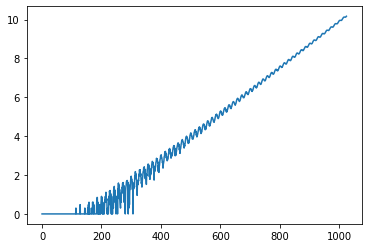

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

masses = [i for i in range(1025)]
way = []
for i in range(1025):
  if table[i]!= 0:
    way.append(math.log10(table[i]))
  else: way.append(0)
plt.plot(masses,way)
plt.show()

**BA5A:Find the Minimum Number of Coins Needed to Make Change**

In [ ]:
def minCoins(amount,coins):
  money = [0]*(amount+1)
  for i in range(1,amount+1):
    money[i] = float('inf')
  for i in range(1,amount+1):
    for j in coins:
      if i>=j:
        money[i] = min(money[i],money[i-j]+1)
  return money[-1]      
coins = [1,5,10,20,25,50]
minCoins(40,coins)

    

2

**BA5C:Find a Longest Common Subsequence of Two Strings**

In [ ]:
def lcs(s1,s2):
  dp = [[0 for i in range(len(s1)+100)] for j in range(len(s2)+100)]
  for i in range(1,len(s1)+1):
    for j in range(1,len(s2)+1):
      if s1[i-1] == s2[j-1]:
        dp[i][j] = dp[i-1][j-1]+1
      else:
        dp[i][j] = max(dp[i-1][j],dp[i][j-1])

  LCS = ''
  i = len(s1)
  j = len(s2)
  while i>0 and j>0:
    if dp[i][j] == dp[i-1][j]:
      i = i-1
    elif dp[i][j] == dp[i][j-1]:
      j = j-1
    else:
      LCS += s1[i-1]
      i = i-1
      j = j-1   



  return LCS[::-1]   

lcs("GTAACAAGATTTCTGACGTCAAAGCACTCAAGATAAATATGGCTCCCTATCCCCTCCAATATACCAAAATGGCCTAACCTTGACCTGGAATTCATGTAACGGAATTTTAGATACCGGTCCCGAGATCCGATTTCGCAAAGTAACGGGTCGTATGATCGTCTCGGAAAGAGGGAACTTTCTGTAGCCGTGTATCAATTCCACGTTGGCCTGGAATGAATTATGTATATCGGGCATTTAGGAGTTCGGTAGCCAGTCTTGCGCTTTTGTTTCTATTATTGCGTACACAACAAAGCATGAAATCTGCCCAATTGGCCTTGCTACCTGTACCTTAGTGACAGTGTCCAATGAGCGAGTCCAGTTTTCTATACACAAGTTGCGGCGACGGCGCTCTACAAGTTCAAACTCGGGAAGAGTCTCCGCAGAATCTAAACGGCTAGCTAAATATATGTGCGTGCGCAGTAAAAGCAGAGTTAAGGGCGGGCAAATAATGTCCGAATCGATTGACCAAACTGAGCTGGATGTGATCAGTTTTGGTGGATGTTACCGTGCCTAATGGCTATATCGCGACGGGGTTCATTCTGTAAAAAACGAGGTAAATATAAATGATGCACGAGGATATTTCATCGTAGGAAGAAACATCATCCCACCGATCTCCACCCAGACGTCACCCAATGTACCGTCCAAAATCCCACGCTTTCGCAGAAGGGGATAAGCGAACATCGCTGCCCCTATTACGTATCACAATCGTCGGTAATGTAACGTCCCACTCCTGCAGTATAAAACGAATCTTGCGAATCAGTGGTCAAAAACCCCTTTGGAACCAGGTAGATGCCGGTTGCTAAACCAGTTTGAACCAACGATCATGGGCTGTATGTAACATTCACTTCGA","TTAGTCTATTGCGTGTTCCACATGTAGGCAGCGCTCATGGACTGATGCGATGAACGCAAATTCTGGAAAACCTTTTGGTTTAGCACTCGGCTTGCGCGTAGATATGAATTAAGCGTAGTGTCCCCCCCCCGAACTTGAGGTGCCGCCGATAGCCAGTTAATACCAGACAAGTATCGAGTAAGGGGGCCCGAACTAAGGGGGCTGCGAGACTAATGACAAGTTTCCTTTTCTATTACATACGTTTGGTAGGAGAATTAGATTCCCCCGACCGATGCACGTTTACGCCTTAGGTTGAGTTATGTACAACTCCTGAGCCGTTAGAATGTCTATGGCGCCCACCATATGTAGACTGTGTGATGGACATTCTACTCCGCCATTCTTTATTTCTTTCATGGGTCGTTAAGCATCACCCGTCGGTGAAATCTTCGACAGAATCAACTGAGCTGGCGAAAGCCCAGCCAACGTACTTCATAAGAGAGACGACCTCACCGTGAGAAGCTTAATCTCCGATGGTGCAGACACGGGCCAGTTGAATGCAGCTGCAAAGACGTGTAGAGTGGACTCAAAAGTGAGGTAGCTAGGATAGTGTCAAGGCTACCGAAGTAGGACTATATTACGAACCGCACAACCGACAAGACAGCCGCGTGTAACGGGCCCTACTTGCAACAATTTTTGTCTAACACCCCCGCACGGCGGCCGCGAATCGAGCAGCGTCGGATGCCCGACTATGGAGTCGGTCGAGGTTCTCGCTGACCTATACTACGCGTTATGTCCCCGAAACTCTACAATGGTTCAAGAAAGTTAAGTTACACTCGGGTACGGTGTACTGAAGATATACTGATGCTATCGCCGTACCGAGAGGACACTGGGCTAGGGAAACGCTTGCAGACTATGACTTTG")  


'TAGTTTTGCGTCACATGTAGGCACCTCAATATCAAAGCAATTCTGGAATTTTGGTTTAGATCGGTCCGAGATATGAATAAGCGTAGTGTCCGAAGAGGGCCGTAGCCGTTATCAATTCAGTGGCCGAATAAGGGGCTGGAGTTGACAGTTTCCTTTTTTTCTATTTGGTAAAAAGATTCCCCAATGCCTTTACGCCTTAGTGAGTGTCAATCGAGCCGTTTTCTATCACAAGTGCGGGAGGCTCTACATTCACTCGGGAAGATCCCCGTCGGTGAAATTTCGCAGAAAACGAGTGGCGAAAAGCCAACGATTCAAAGAGGAGATCAGTGGAGTTACTCCATGGTGCGACGGGGTTATCTGAAAACGGTAATATAAATGATGCAGGATATTCACTAGAAGAACATATACGACCCACCCGACGCACCCTGTACCTCCAAAATCCACCCGCAGGGGGATAAGCGTCGTGCCCCTATTCGTATCACAATCGCGTATGTCCCCACTCTCAGTTAAAAGAATTCATCGGGTACTTTGGAACTGATGCTTGCCGTACCAAGACATGGGCTGATGAACATACTTG'

In [ ]:
file = open('text.txt','r+')
l = file.readlines()
li =[]
for i in l:
  if '\n' in i:
    li.append(i.replace('\n',' '))
  else:
    li.append(i)  
li  
file.writelines(li) 

In [ ]:
with open('text.txt','r') as f:
  k,t = [int(x) for x in f.readline().split()]
  strings = [x.replace('\n','') for x in f.readlines()]
print(k,t)  
print(strings)


with open('text2.txt','w') as out:
  for i in strings:
    out.write(i+'\n')

8 5
['CGCCCCTCTCGGGGGTGTTCAGTAAACGGCCA', 'GGGCGAGGTATGTGTAAGTGCCAAGGTGCCAG', 'TAGTACCGAGACCGAAAGAAGTATACAGGCGT', 'TAGATCAAGTTTCAGGTGCACGTCGGTGAACC', 'AATCCACCAGCTCCACGTGCAATGTTGGCCTA']
